In [ ]:
import numpy as np
import glob
import re
import shutil
import random
import pandas as pd
import tensorflow as tf
from scipy.interpolate import interp1d
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.decomposition import KernelPCA

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
files = glob.glob('/content/drive/MyDrive/AlzheimerProcessed/*/*.csv')


In [ ]:
len(files)

65

In [ ]:
def clean(path):
    df = pd.read_csv(path)
    for column in df.columns:
        if df[column].dtype == 'object':
            print("Sample : ",path," feature : ",column," is uncleaned")
            df[column] = pd.to_numeric(df[column], errors='coerce')
            df[column] = df[column].fillna(method='ffill')
            df[column] = df[column].fillna(method='bfill')
    df = df.iloc[:1024,:]
    df.to_csv(path, index=False)

In [ ]:
for i in files:
    clean(i)

In [ ]:
files = glob.glob("/content/drive/MyDrive/AlzheimerProcessed/*/*.csv")
len(files)

65

In [ ]:
shutil.copytree("/content/drive/MyDrive/AlzheimerProcessed", "/content/drive/MyDrive/AlzheimerProcessedback2")


'/content/drive/MyDrive/AlzheimerProcessedback2'

In [ ]:
def positive_shift(path, replace=False, value=0):
    df = pd.read_csv(path)
    shift = random.randint(3, 15)
    df = df.shift(shift)
    if replace:
        df = df.fillna(df.mean())
    df = df.fillna(0)
    deviation = df.std().tolist()
    noise = np.random.normal([0]*19, deviation, 19)
    df += noise / 10
    return df

def negative_shift(path, replace=False, value=0):
    df = pd.read_csv(path)
    shift = random.randint(-15, -3)
    df = df.shift(shift)
    if replace:
        df = df.fillna(df.mean())
    df = df.fillna(0)
    deviation = df.std().tolist()
    noise = np.random.normal([0]*19, deviation, 19)
    df += noise / 10
    return df

def shift(path, label, file_no, target_dir):
    pn = random.randint(0, 1)
    file_name = f"{target_dir}/{label}{file_no}.csv"

    if pn == 1:
        df = positive_shift(path)
        print(path, " -> ", file_name, " Positive Shift")
    else:
        df = negative_shift(path)
        print(path, " -> ", file_name, " Negative Shift")

    df.to_csv(file_name, index=False)

def add_shift_per_sample(path, label):
    file_no = 25
    all_files = glob.glob(path + "/*")
    for i in all_files:
        shift(i, label, file_no, path)
        file_no += 1


In [ ]:
import pandas as pd
import glob
import random

def mean_roll(path, label, file_no, target_dir):
    df = pd.read_csv(path)
    window = random.randint(3, 8)
    df = df.rolling(window=5, center=True).mean().fillna(0)
    file_name = label + str(file_no) + ".csv"
    file_name = target_dir + "/" + file_name
    print(path, " -> ", file_name)
    df = df.ffill()
    df = df.fillna(0)
    df.to_csv(file_name, index=False)

def add_rolling_per_sample(path, label):
    file_no = 49
    all_files = glob.glob(path + "/*")
    for i in all_files:
        mean_roll(i, label, file_no, path)
        file_no += 1


In [ ]:
add_shift_per_sample("/content/drive/MyDrive/AlzheimerProcessed/AD", "alz_")

/content/drive/MyDrive/AlzheimerProcessed/AD/sub-020.csv  ->  /content/drive/MyDrive/AlzheimerProcessed/AD/alz_25.csv  Negative Shift
/content/drive/MyDrive/AlzheimerProcessed/AD/sub-018.csv  ->  /content/drive/MyDrive/AlzheimerProcessed/AD/alz_26.csv  Positive Shift
/content/drive/MyDrive/AlzheimerProcessed/AD/sub-012.csv  ->  /content/drive/MyDrive/AlzheimerProcessed/AD/alz_27.csv  Negative Shift
/content/drive/MyDrive/AlzheimerProcessed/AD/sub-019.csv  ->  /content/drive/MyDrive/AlzheimerProcessed/AD/alz_28.csv  Positive Shift
/content/drive/MyDrive/AlzheimerProcessed/AD/sub-014.csv  ->  /content/drive/MyDrive/AlzheimerProcessed/AD/alz_29.csv  Positive Shift
/content/drive/MyDrive/AlzheimerProcessed/AD/sub-010.csv  ->  /content/drive/MyDrive/AlzheimerProcessed/AD/alz_30.csv  Negative Shift
/content/drive/MyDrive/AlzheimerProcessed/AD/sub-006.csv  ->  /content/drive/MyDrive/AlzheimerProcessed/AD/alz_31.csv  Negative Shift
/content/drive/MyDrive/AlzheimerProcessed/AD/sub-016.csv  ->  

In [ ]:
add_shift_per_sample("/content/drive/MyDrive/AlzheimerProcessed/CN", "healthy_")

/content/drive/MyDrive/AlzheimerProcessed/CN/sub-046.csv  ->  /content/drive/MyDrive/AlzheimerProcessed/CN/healthy_25.csv  Negative Shift
/content/drive/MyDrive/AlzheimerProcessed/CN/sub-065.csv  ->  /content/drive/MyDrive/AlzheimerProcessed/CN/healthy_26.csv  Negative Shift
/content/drive/MyDrive/AlzheimerProcessed/CN/sub-053.csv  ->  /content/drive/MyDrive/AlzheimerProcessed/CN/healthy_27.csv  Positive Shift
/content/drive/MyDrive/AlzheimerProcessed/CN/sub-052.csv  ->  /content/drive/MyDrive/AlzheimerProcessed/CN/healthy_28.csv  Negative Shift
/content/drive/MyDrive/AlzheimerProcessed/CN/sub-048.csv  ->  /content/drive/MyDrive/AlzheimerProcessed/CN/healthy_29.csv  Positive Shift
/content/drive/MyDrive/AlzheimerProcessed/CN/sub-050.csv  ->  /content/drive/MyDrive/AlzheimerProcessed/CN/healthy_30.csv  Positive Shift
/content/drive/MyDrive/AlzheimerProcessed/CN/sub-049.csv  ->  /content/drive/MyDrive/AlzheimerProcessed/CN/healthy_31.csv  Negative Shift
/content/drive/MyDrive/AlzheimerPr

In [ ]:
def mean_roll(path, label, file_no, target_dir):
    df = pd.read_csv(path)
    window = random.randint(3, 8)
    df = df.rolling(window=5, center=True).mean().fillna(0)
    file_name = label + str(file_no) + ".csv"
    file_name = target_dir + "/" + file_name
    print(path, " -> ", file_name)
    df = df.ffill()  # Replaces the deprecated method='ffill'
    df = df.fillna(0)
    df.to_csv(file_name, index=False)

def add_rolling_per_sample(path, label):
    file_no = 49
    all_files = glob.glob(path + "/*")
    for i in all_files:
        mean_roll(i, label, file_no, path)
        file_no += 1

In [ ]:
add_rolling_per_sample("/content/drive/MyDrive/AlzheimerProcessed/AD", "alz_")


/content/drive/MyDrive/AlzheimerProcessed/AD/sub-020.csv  ->  /content/drive/MyDrive/AlzheimerProcessed/AD/alz_49.csv
/content/drive/MyDrive/AlzheimerProcessed/AD/sub-018.csv  ->  /content/drive/MyDrive/AlzheimerProcessed/AD/alz_50.csv
/content/drive/MyDrive/AlzheimerProcessed/AD/sub-012.csv  ->  /content/drive/MyDrive/AlzheimerProcessed/AD/alz_51.csv
/content/drive/MyDrive/AlzheimerProcessed/AD/sub-019.csv  ->  /content/drive/MyDrive/AlzheimerProcessed/AD/alz_52.csv
/content/drive/MyDrive/AlzheimerProcessed/AD/sub-014.csv  ->  /content/drive/MyDrive/AlzheimerProcessed/AD/alz_53.csv
/content/drive/MyDrive/AlzheimerProcessed/AD/sub-010.csv  ->  /content/drive/MyDrive/AlzheimerProcessed/AD/alz_54.csv
/content/drive/MyDrive/AlzheimerProcessed/AD/sub-006.csv  ->  /content/drive/MyDrive/AlzheimerProcessed/AD/alz_55.csv
/content/drive/MyDrive/AlzheimerProcessed/AD/sub-016.csv  ->  /content/drive/MyDrive/AlzheimerProcessed/AD/alz_56.csv
/content/drive/MyDrive/AlzheimerProcessed/AD/sub-013.csv

In [ ]:
add_rolling_per_sample("/content/drive/MyDrive/AlzheimerProcessed/CN", "healthy_")

/content/drive/MyDrive/AlzheimerProcessed/CN/sub-046.csv  ->  /content/drive/MyDrive/AlzheimerProcessed/CN/healthy_49.csv
/content/drive/MyDrive/AlzheimerProcessed/CN/sub-065.csv  ->  /content/drive/MyDrive/AlzheimerProcessed/CN/healthy_50.csv
/content/drive/MyDrive/AlzheimerProcessed/CN/sub-053.csv  ->  /content/drive/MyDrive/AlzheimerProcessed/CN/healthy_51.csv
/content/drive/MyDrive/AlzheimerProcessed/CN/sub-052.csv  ->  /content/drive/MyDrive/AlzheimerProcessed/CN/healthy_52.csv
/content/drive/MyDrive/AlzheimerProcessed/CN/sub-048.csv  ->  /content/drive/MyDrive/AlzheimerProcessed/CN/healthy_53.csv
/content/drive/MyDrive/AlzheimerProcessed/CN/sub-050.csv  ->  /content/drive/MyDrive/AlzheimerProcessed/CN/healthy_54.csv
/content/drive/MyDrive/AlzheimerProcessed/CN/sub-049.csv  ->  /content/drive/MyDrive/AlzheimerProcessed/CN/healthy_55.csv
/content/drive/MyDrive/AlzheimerProcessed/CN/sub-051.csv  ->  /content/drive/MyDrive/AlzheimerProcessed/CN/healthy_56.csv
/content/drive/MyDrive/A

In [ ]:
shutil.make_archive('Alzheimer', 'zip', '/content/drive/MyDrive/AlzheimerProcessed')


'/content/Alzheimer.zip'

In [ ]:
# Splitting data

def return_splits():
    augmented_files = glob.glob("/content/drive/MyDrive/AlzheimerProcessed/*/*")  # CN and AD folders
    train_files = list(set(augmented_files) - set(files))  # 'files' should be your original non-augmented files
    test_files = files

    for i in range(0, len(test_files), 12):
        train_files += test_files[i:i+4]

    test_files = list(set(test_files) - set(train_files))
    return train_files, test_files

train, test = return_splits()


In [ ]:
len(train),len(test)

(202, 41)

In [ ]:
def decompose(wave_data):
    time_series_data = wave_data.T
    kpca = KernelPCA(n_components=5, kernel='rbf', gamma=0.1)
    compressed_data = kpca.fit_transform(time_series_data).mean(axis = 1)
    return compressed_data.tolist()

In [ ]:
def handle_nan(df_f):
    df = pd.read_csv(df_f)
    count = 0
    if df.isnull().sum().sum() != 0:
        print(df_f,end = " ")
        while df.isnull().sum().sum() != 0:
            count = count + 1
            df = df.fillna(method = 'ffill')
            df = df.fillna(method = 'bfill')
        print("   " , count, "null values found and taken care of","\n")
    return df


In [ ]:
def create_ds(all_files):
    dataset = []
    for file in all_files:
        df = handle_nan(file)
        scaler = StandardScaler()
        df = scaler.fit_transform(df)
        sample = decompose(df)

        sample.append("closed")

        if "/CN/" in file:
            sample.append("healthy")
        elif "/AD/" in file:
            sample.append("alzeimer")

        dataset.append(sample)
    return pd.DataFrame(dataset)


In [ ]:
train_df = create_ds(train)

In [ ]:
train_df.to_csv("train.csv",index= False)

In [ ]:
test_df = create_ds(test)

In [ ]:
test_df.to_csv("test.csv",index= False)

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
import random
from joblib import dump, load
from sklearn.model_selection import *
import numpy as np

In [ ]:
from warnings import simplefilter
from sklearn.exceptions import ConvergenceWarning
simplefilter("ignore", category=ConvergenceWarning)

In [ ]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")


In [ ]:
train.head()

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,20
0,0.118003,-0.068171,0.008100,0.064015,-0.039166,0.176142,-0.118630,0.194973,-0.139624,0.110144,...,-0.067493,-0.112906,-0.068156,-0.172896,-0.051459,0.063996,-0.011425,0.010446,closed,alzeimer
1,-0.188922,-0.110321,0.095112,0.033808,-0.018490,0.210493,-0.072626,0.266333,-0.046334,0.181817,...,-0.080888,-0.191422,-0.014549,-0.153931,0.135288,-0.015863,0.036240,0.047367,closed,alzeimer
2,-0.079832,-0.099714,0.147913,-0.132260,0.156967,-0.073598,0.055670,-0.091036,0.019640,-0.068970,...,0.104312,-0.100493,-0.100491,0.005372,-0.080069,0.164992,0.170001,-0.100448,closed,alzeimer
3,-0.031116,0.011996,0.025720,0.060274,0.153961,-0.002136,-0.276990,-0.034347,-0.026126,-0.031028,...,-0.048698,0.060895,0.014280,-0.020831,0.015080,0.207500,0.193777,-0.287398,closed,alzeimer
4,0.064087,0.060897,0.005807,-0.130540,0.046568,-0.026162,-0.173464,0.136170,0.162003,0.181030,...,-0.054449,-0.101689,-0.176635,0.032786,-0.170550,-0.001442,0.009320,0.144015,closed,healthy


In [ ]:
train.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202 entries, 0 to 201
Data columns (total 21 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       202 non-null    float64
 1   1       202 non-null    float64
 2   2       202 non-null    float64
 3   3       202 non-null    float64
 4   4       202 non-null    float64
 5   5       202 non-null    float64
 6   6       202 non-null    float64
 7   7       202 non-null    float64
 8   8       202 non-null    float64
 9   9       202 non-null    float64
 10  10      202 non-null    float64
 11  11      202 non-null    float64
 12  12      202 non-null    float64
 13  13      202 non-null    float64
 14  14      202 non-null    float64
 15  15      202 non-null    float64
 16  16      202 non-null    float64
 17  17      202 non-null    float64
 18  18      202 non-null    float64
 19  19      202 non-null    object 
 20  20      202 non-null    object 
dtypes: float64(19), object(2)
memory usage:

In [ ]:
test.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41 entries, 0 to 40
Data columns (total 21 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       41 non-null     float64
 1   1       41 non-null     float64
 2   2       41 non-null     float64
 3   3       41 non-null     float64
 4   4       41 non-null     float64
 5   5       41 non-null     float64
 6   6       41 non-null     float64
 7   7       41 non-null     float64
 8   8       41 non-null     float64
 9   9       41 non-null     float64
 10  10      41 non-null     float64
 11  11      41 non-null     float64
 12  12      41 non-null     float64
 13  13      41 non-null     float64
 14  14      41 non-null     float64
 15  15      41 non-null     float64
 16  16      41 non-null     float64
 17  17      41 non-null     float64
 18  18      41 non-null     float64
 19  19      41 non-null     object 
 20  20      41 non-null     object 
dtypes: float64(19), object(2)
memory usage: 6

In [ ]:
train.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
count,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000
mean,0.002326,0.011108,-0.002098,-0.026373,0.005810,-0.018496,0.008693,0.034937,0.013511,0.028574,-0.023089,-0.010073,-0.042906,-0.059745,-0.006580,0.011071,0.034265,0.010068,0.028998
std,0.130287,0.104593,0.108196,0.109808,0.096506,0.115600,0.125356,0.112189,0.116095,0.099404,0.126096,0.107329,0.101069,0.092460,0.125230,0.104921,0.114790,0.114447,0.117928
min,-0.249739,-0.202677,-0.252414,-0.271273,-0.223908,-0.255731,-0.283195,-0.286284,-0.260991,-0.191131,-0.315217,-0.276035,-0.243694,-0.256793,-0.300611,-0.235873,-0.282108,-0.262721,-0.288252
25%,-0.096242,-0.081347,-0.086865,-0.119670,-0.067418,-0.107358,-0.089674,-0.019039,-0.064418,-0.055557,-0.107180,-0.084615,-0.108718,-0.120219,-0.108295,-0.061884,-0.043224,-0.075221,-0.045972
50%,-0.015555,0.013921,-0.022482,-0.013542,0.018184,-0.022158,0.031742,0.057939,0.014884,0.031280,-0.013577,-0.016141,-0.075011,-0.073599,-0.001046,0.007260,0.034096,0.011000,0.033889
75%,0.112622,0.110614,0.094863,0.061379,0.065480,0.080757,0.115985,0.106985,0.114500,0.112810,0.067894,0.063249,0.006287,-0.002973,0.091601,0.090583,0.112937,0.095634,0.111961
max,0.233446,0.218970,0.247938,0.210497,0.263807,0.217972,0.242085,0.266333,0.229138,0.197540,0.250954,0.293727,0.245106,0.159503,0.305878,0.245147,0.358342,0.267771,0.241879


In [ ]:
test.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
count,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000
mean,0.007903,0.007540,-0.001327,-0.040716,0.025263,-0.027900,0.011822,0.053289,-0.002838,0.024176,-0.036479,0.002259,-0.044525,-0.042938,-0.030086,0.007966,0.029432,0.022304,0.034856
std,0.126051,0.111002,0.114407,0.107105,0.103471,0.111458,0.125621,0.107252,0.119256,0.104189,0.120341,0.099920,0.111808,0.096705,0.121454,0.112404,0.114558,0.107115,0.110011
min,-0.248744,-0.202458,-0.238884,-0.220875,-0.198676,-0.255730,-0.255666,-0.286167,-0.259092,-0.190213,-0.268705,-0.262837,-0.187272,-0.209641,-0.294660,-0.175026,-0.213697,-0.170531,-0.223291
25%,-0.105401,-0.085750,-0.091396,-0.122439,-0.040082,-0.107595,-0.085308,0.010445,-0.087397,-0.060799,-0.115295,-0.059230,-0.111273,-0.109395,-0.114501,-0.068353,-0.039834,-0.064378,-0.025585
50%,-0.007075,0.028931,-0.001954,-0.073408,0.035501,-0.043598,0.033951,0.068054,-0.008798,0.029332,-0.022969,0.008185,-0.085867,-0.061701,-0.023108,-0.006766,0.028717,0.024558,0.028306
75%,0.112744,0.113511,0.098241,0.022930,0.069771,0.082453,0.113385,0.117327,0.100053,0.080470,0.044656,0.057698,0.001743,0.015537,0.067504,0.080475,0.107847,0.099676,0.096602
max,0.222974,0.170569,0.210746,0.168551,0.256114,0.221626,0.211423,0.263514,0.213737,0.211221,0.200757,0.271506,0.232252,0.159083,0.226465,0.245070,0.348534,0.222436,0.240331


In [ ]:
print(train.isnull().sum())

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
15    0
16    0
17    0
18    0
19    0
20    0
dtype: int64


In [ ]:
print(test.isnull().sum())

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
15    0
16    0
17    0
18    0
19    0
20    0
dtype: int64


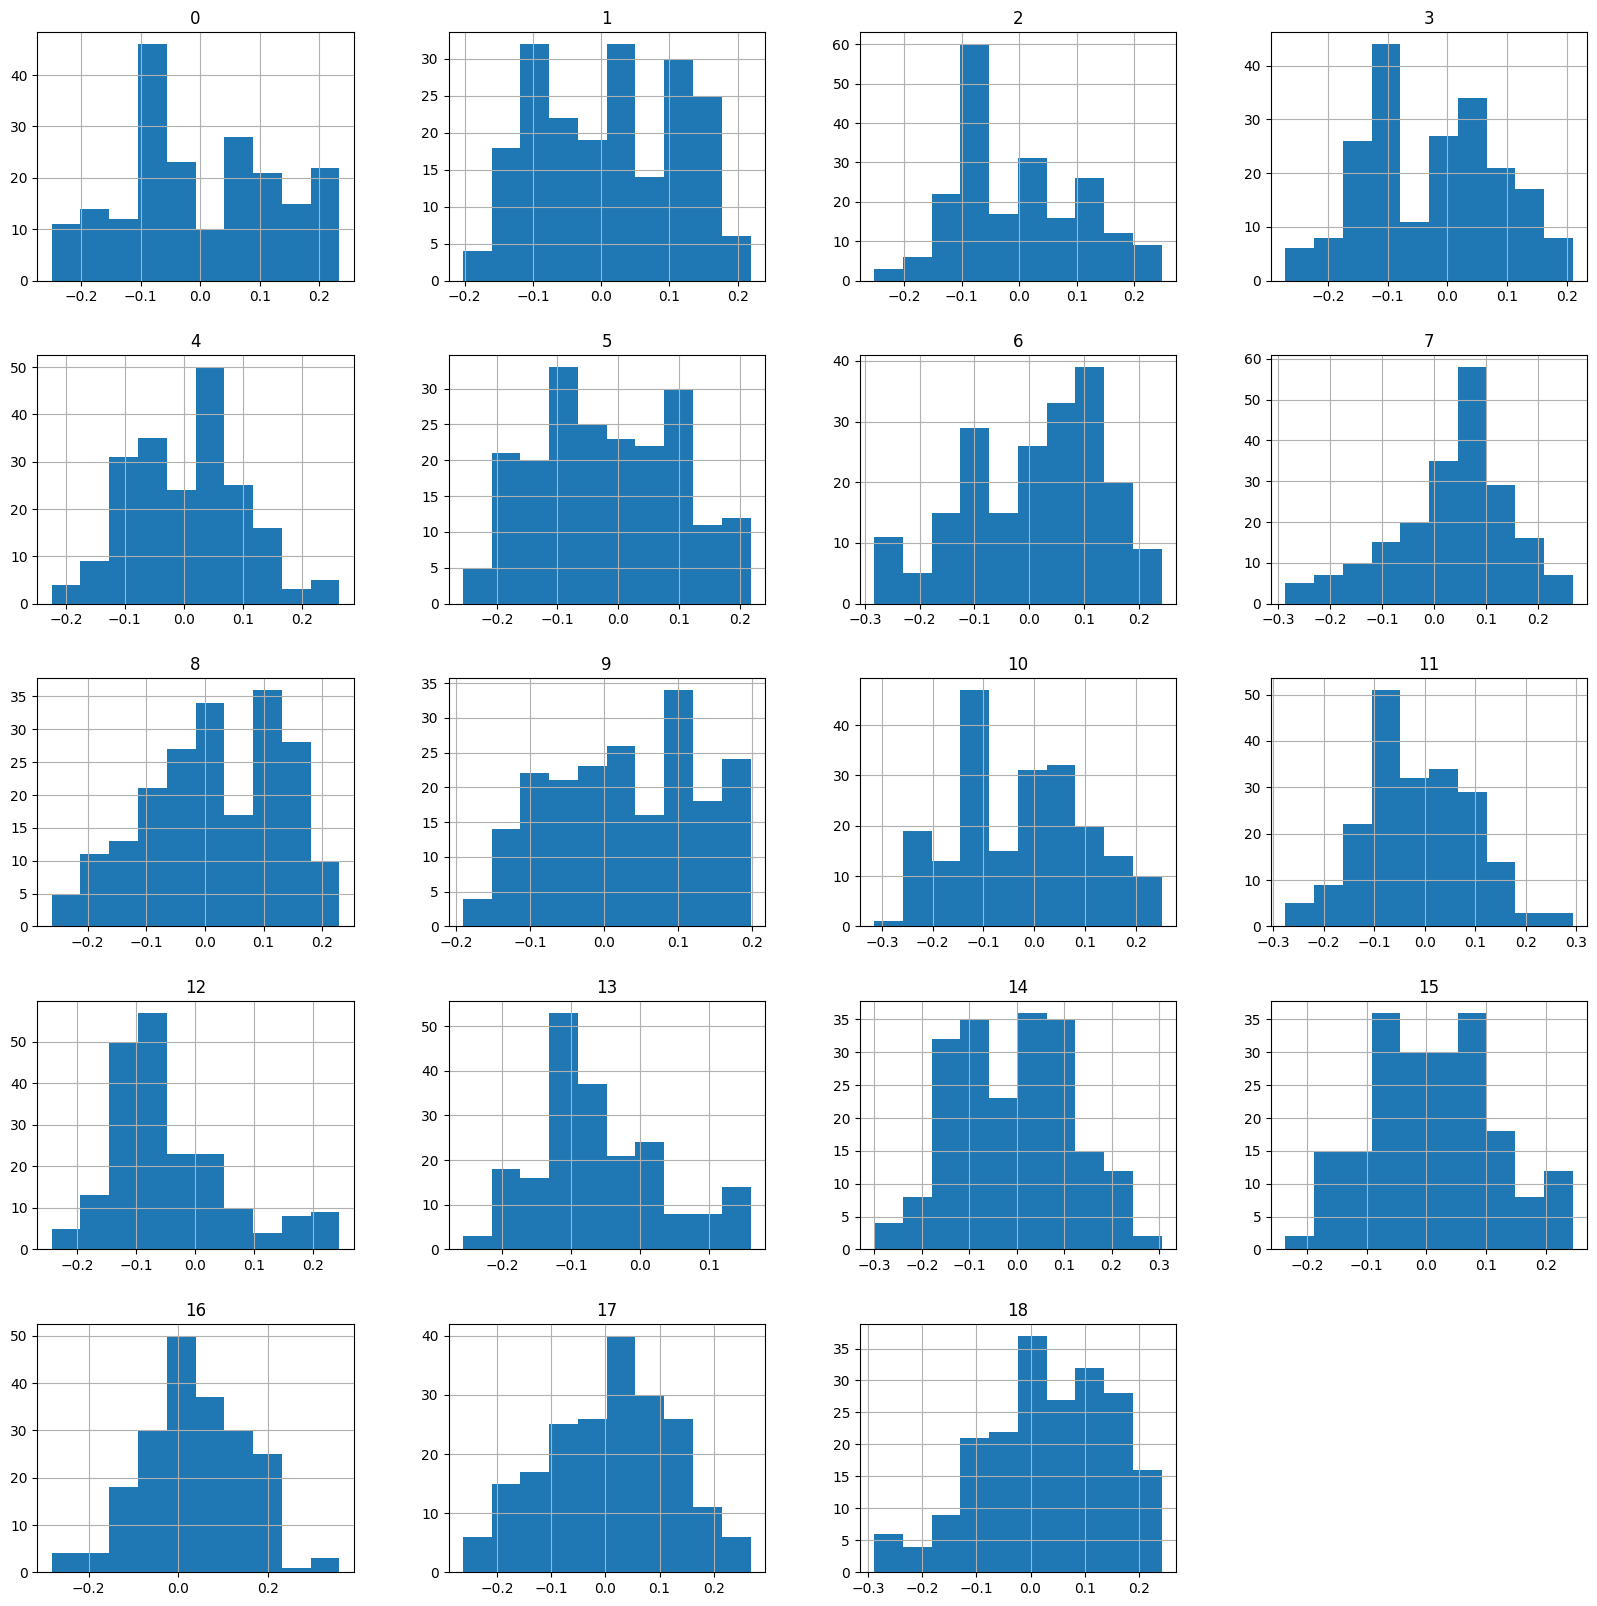

In [ ]:
p = train.hist(figsize = (20,20))

In [ ]:
def encode(df):

    df = df.select_dtypes(include=['number'])


    if 'alz_true' not in df.columns:
        raise ValueError("'alz_true' column not found.")


    cols = [col for col in df.columns if col != 'alz_true'] + ['alz_true']
    df = df[cols]

    return df


In [ ]:
train = encode(train)
test = encode(test)

X_train = train.iloc[:, :-1].values
y_train = train.iloc[:, -1].values

X_test = test.iloc[:, :-1].values
y_test = test.iloc[:, -1].values


In [ ]:
train = encode(train)

In [ ]:
test = encode(test)

In [ ]:
train

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,alz_true
0,0.118003,-0.068171,0.008100,0.064015,-0.039166,0.176142,-0.118630,0.194973,-0.139624,0.110144,0.104109,-0.067493,-0.112906,-0.068156,-0.172896,-0.051459,0.063996,-0.011425,0.010446,1
1,-0.188922,-0.110321,0.095112,0.033808,-0.018490,0.210493,-0.072626,0.266333,-0.046334,0.181817,-0.113114,-0.080888,-0.191422,-0.014549,-0.153931,0.135288,-0.015863,0.036240,0.047367,1
2,-0.079832,-0.099714,0.147913,-0.132260,0.156967,-0.073598,0.055670,-0.091036,0.019640,-0.068970,0.102043,0.104312,-0.100493,-0.100491,0.005372,-0.080069,0.164992,0.170001,-0.100448,1
3,-0.031116,0.011996,0.025720,0.060274,0.153961,-0.002136,-0.276990,-0.034347,-0.026126,-0.031028,0.015186,-0.048698,0.060895,0.014280,-0.020831,0.015080,0.207500,0.193777,-0.287398,1
4,0.064087,0.060897,0.005807,-0.130540,0.046568,-0.026162,-0.173464,0.136170,0.162003,0.181030,-0.007751,-0.054449,-0.101689,-0.176635,0.032786,-0.170550,-0.001442,0.009320,0.144015,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
197,-0.012565,-0.055515,-0.071837,0.050795,-0.012880,-0.169189,0.242085,-0.125472,0.229138,-0.006084,-0.014285,-0.071715,0.034774,-0.095575,0.305878,-0.087993,-0.018677,-0.115222,-0.005661,0
198,0.197357,0.163961,-0.078246,0.180099,0.045539,-0.063615,0.044244,-0.147129,0.062514,-0.114334,0.056042,-0.164639,-0.165501,-0.039679,0.095801,-0.142217,0.023244,0.017006,0.029557,0
199,0.224650,0.115174,-0.066340,-0.103884,-0.123833,-0.135128,-0.073525,0.011842,0.072663,0.083177,0.209300,0.086931,-0.114111,-0.071769,0.051688,0.068470,-0.108813,-0.136347,0.009856,0
200,-0.021563,0.192068,0.106017,0.149447,-0.070911,0.044376,-0.112046,0.090305,-0.111218,-0.106845,0.039175,0.135771,-0.129787,-0.110632,-0.163385,0.123462,0.079971,-0.057849,-0.076358,0


In [ ]:
test

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,alz_true
0,-0.184155,-0.054840,-0.174112,-0.175003,0.059119,-0.043598,0.113385,0.115116,0.123699,-0.099051,-0.165211,0.043949,-0.047338,0.049799,0.067504,0.104549,0.002998,0.104996,0.158192,1
1,0.176885,0.049892,0.100452,-0.106994,0.035501,-0.181235,0.038508,-0.188472,0.108885,-0.040485,0.182885,-0.033474,0.048254,-0.055530,0.112724,-0.038420,0.028717,-0.109735,-0.128360,1
2,-0.026269,-0.019385,0.039561,-0.009857,0.011389,-0.070606,0.149001,0.081867,0.152377,0.075956,-0.161034,-0.154300,-0.160796,-0.157825,-0.082346,-0.055860,0.043437,0.117314,0.227378,1
3,0.114077,-0.060617,0.210746,0.001740,0.040621,0.054831,-0.088674,0.017238,0.085080,-0.138328,0.104721,0.018430,-0.111273,-0.107544,-0.118022,-0.137051,0.172741,-0.073667,0.014950,0
4,0.201310,0.131379,0.168017,-0.158989,-0.055083,0.106143,-0.060780,-0.042988,-0.061248,-0.060799,0.175356,-0.059230,-0.061334,-0.046347,-0.061248,-0.060738,-0.108489,0.099676,-0.044611,0
5,0.060170,0.058760,0.006736,-0.129477,0.043077,-0.025651,-0.172887,0.134262,0.167123,0.185257,-0.007454,-0.053466,-0.104670,-0.175325,0.032318,-0.168716,-0.003675,0.010007,0.143614,0
6,-0.013951,-0.202458,-0.005057,-0.220875,0.249491,-0.199152,0.095455,-0.041504,-0.008798,-0.006069,-0.013361,-0.012575,0.230698,-0.005765,0.013400,0.025204,0.062845,0.049822,0.002651,1
7,0.066719,0.133852,0.028813,0.148993,-0.008348,0.088648,-0.255382,0.022471,-0.259092,-0.014065,0.006442,0.023461,-0.012422,-0.008020,-0.176503,-0.088504,0.171277,0.142816,-0.011157,0
8,-0.081564,-0.187134,0.098241,-0.154725,-0.057940,0.114926,0.071355,0.153919,-0.041661,0.047318,0.097216,-0.126699,-0.067668,0.114926,0.071301,0.153919,-0.056153,-0.043436,-0.106142,1
9,-0.124386,-0.085750,-0.084467,-0.117331,0.148167,-0.039301,0.152928,0.059934,0.096658,-0.076887,-0.220749,-0.084443,0.001743,-0.164927,0.113718,-0.123990,0.178205,0.222436,0.148441,1


In [ ]:
X_train,y_train = train[train.columns[:-1]].values , train[train.columns[-1]].values
X_test,y_test = test[test.columns[:-1]].values, test[test.columns[-1]].values

In [ ]:
print(X_train.shape, y_train.shape)

(202, 19) (202,)


In [ ]:
print(X_test.shape, y_test.shape)

(41, 19) (41,)


In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)


LogisticRegression()

Logistic Regression Accuracy: 68.29%

Classification Report:
              precision    recall  f1-score   support

           0       0.62      0.59      0.61        17
           1       0.72      0.75      0.73        24

    accuracy                           0.68        41
   macro avg       0.67      0.67      0.67        41
weighted avg       0.68      0.68      0.68        41


Confusion Matrix:
[[10  7]
 [ 6 18]]


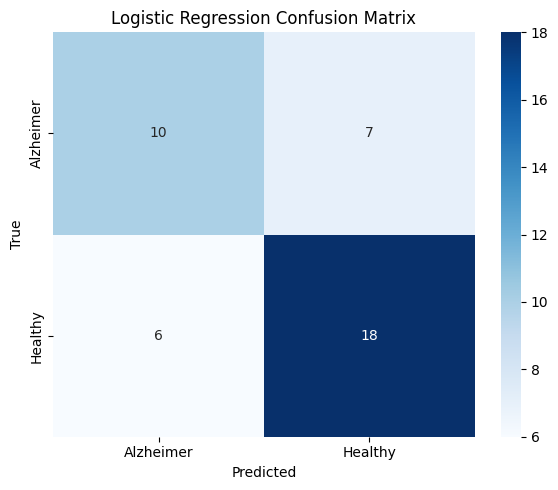

In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

y_pred = logreg.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Logistic Regression Accuracy: {accuracy * 100:.2f}%")

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(cm)

plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=True,
            xticklabels=['Alzheimer', 'Healthy'],
            yticklabels=['Alzheimer', 'Healthy'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Logistic Regression Confusion Matrix')
plt.tight_layout()
plt.show()


In [ ]:
from sklearn import svm

In [ ]:
clf = svm.SVC()
clf.fit(X_train, y_train)

SVC()

SVM Accuracy: 90.24%

SVM Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.94      0.89        17
           1       0.95      0.88      0.91        24

    accuracy                           0.90        41
   macro avg       0.90      0.91      0.90        41
weighted avg       0.91      0.90      0.90        41


SVM Confusion Matrix:
[[16  1]
 [ 3 21]]


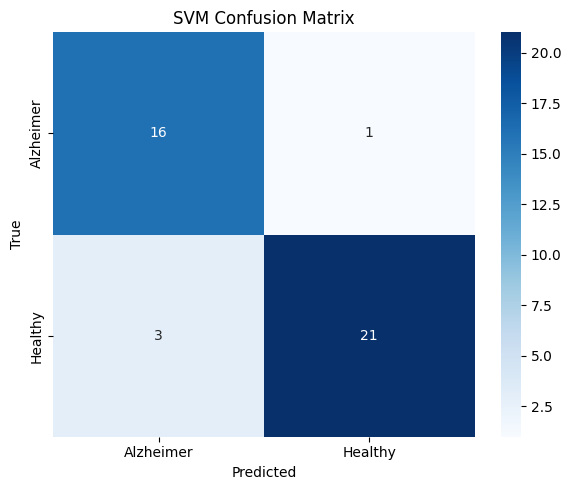

In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

y_pred_svm = clf.predict(X_test)

accuracy_svm = accuracy_score(y_test, y_pred_svm)
print(f"SVM Accuracy: {accuracy_svm * 100:.2f}%")


print("\nSVM Classification Report:")
print(classification_report(y_test, y_pred_svm))


cm_svm = confusion_matrix(y_test, y_pred_svm)
print("\nSVM Confusion Matrix:")
print(cm_svm)

plt.figure(figsize=(6, 5))
sns.heatmap(cm_svm, annot=True, fmt='d', cmap='Blues', cbar=True,
            xticklabels=['Alzheimer', 'Healthy'],
            yticklabels=['Alzheimer', 'Healthy'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('SVM Confusion Matrix')
plt.tight_layout()
plt.show()


In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=3)

KNN Accuracy: 87.80%

KNN Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.94      0.86        17
           1       0.95      0.83      0.89        24

    accuracy                           0.88        41
   macro avg       0.88      0.89      0.88        41
weighted avg       0.89      0.88      0.88        41


KNN Confusion Matrix:
[[16  1]
 [ 4 20]]


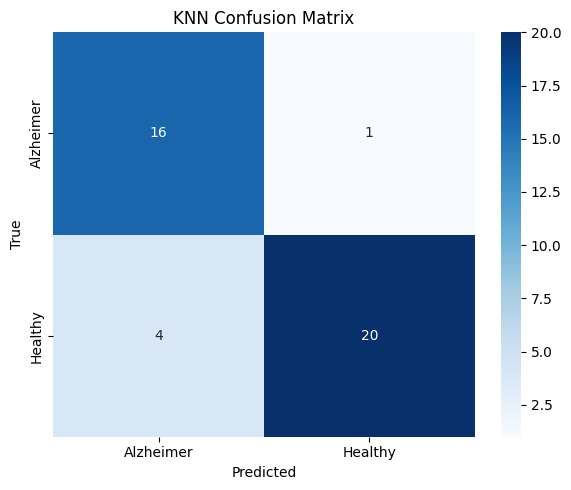

In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

y_pred_knn = knn.predict(X_test)

accuracy_knn = accuracy_score(y_test, y_pred_knn)
print(f"KNN Accuracy: {accuracy_knn * 100:.2f}%")

print("\nKNN Classification Report:")
print(classification_report(y_test, y_pred_knn))

cm_knn = confusion_matrix(y_test, y_pred_knn)
print("\nKNN Confusion Matrix:")
print(cm_knn)

plt.figure(figsize=(6, 5))
sns.heatmap(cm_knn, annot=True, fmt='d', cmap='Blues', cbar=True,
            xticklabels=['Alzheimer', 'Healthy'],
            yticklabels=['Alzheimer', 'Healthy'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('KNN Confusion Matrix')
plt.tight_layout()
plt.show()


In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

DecisionTreeClassifier()

Decision Tree Accuracy: 80.49%

Decision Tree Classification Report:
              precision    recall  f1-score   support

           0       0.71      0.88      0.79        17
           1       0.90      0.75      0.82        24

    accuracy                           0.80        41
   macro avg       0.81      0.82      0.80        41
weighted avg       0.82      0.80      0.81        41


Decision Tree Confusion Matrix:
[[15  2]
 [ 6 18]]


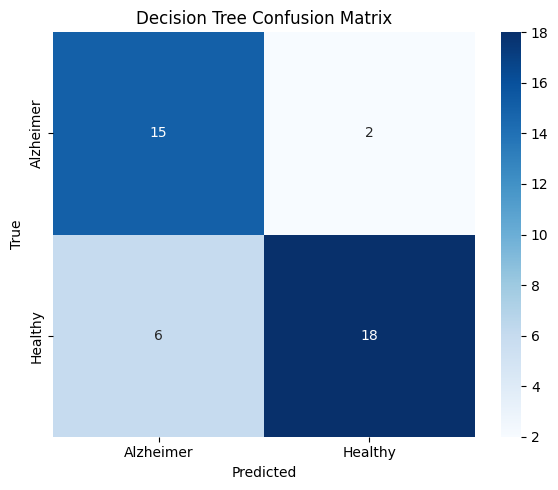

In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

y_pred_dt = dt.predict(X_test)

accuracy_dt = accuracy_score(y_test, y_pred_dt)
print(f"Decision Tree Accuracy: {accuracy_dt * 100:.2f}%")

print("\nDecision Tree Classification Report:")
print(classification_report(y_test, y_pred_dt))

cm_dt = confusion_matrix(y_test, y_pred_dt)
print("\nDecision Tree Confusion Matrix:")
print(cm_dt)

plt.figure(figsize=(6, 5))
sns.heatmap(cm_dt, annot=True, fmt='d', cmap='Blues', cbar=True,
            xticklabels=['Alzheimer', 'Healthy'],
            yticklabels=['Alzheimer', 'Healthy'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Decision Tree Confusion Matrix')
plt.tight_layout()
plt.show()


In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rf = RandomForestClassifier()
rf.fit(X_train,y_train)

RandomForestClassifier()

Random Forest Accuracy: 97.56%

Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.94      1.00      0.97        17
           1       1.00      0.96      0.98        24

    accuracy                           0.98        41
   macro avg       0.97      0.98      0.98        41
weighted avg       0.98      0.98      0.98        41


Random Forest Confusion Matrix:
[[17  0]
 [ 1 23]]


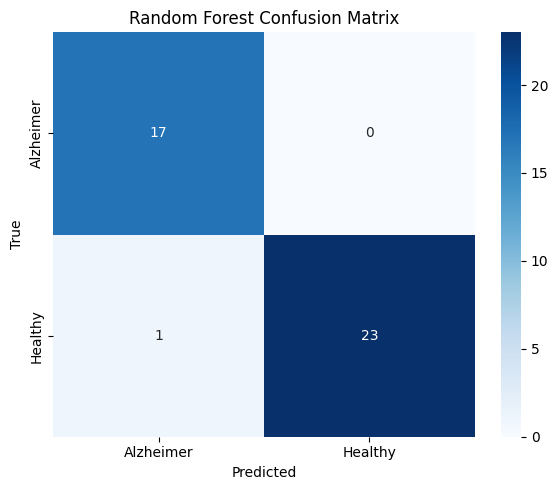

In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

y_pred_rf = rf.predict(X_test)

accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"Random Forest Accuracy: {accuracy_rf * 100:.2f}%")

print("\nRandom Forest Classification Report:")
print(classification_report(y_test, y_pred_rf))

cm_rf = confusion_matrix(y_test, y_pred_rf)
print("\nRandom Forest Confusion Matrix:")
print(cm_rf)
plt.figure(figsize=(6, 5))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues', cbar=True,
            xticklabels=['Alzheimer', 'Healthy'],
            yticklabels=['Alzheimer', 'Healthy'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Random Forest Confusion Matrix')
plt.tight_layout()
plt.show()


In [ ]:
from sklearn.naive_bayes import GaussianNB

In [ ]:
gaus = GaussianNB()
gaus.fit(X_train,y_train)

GaussianNB()

Gaussian Naive Bayes Accuracy: 75.61%

GaussianNB Classification Report:
              precision    recall  f1-score   support

           0       0.68      0.76      0.72        17
           1       0.82      0.75      0.78        24

    accuracy                           0.76        41
   macro avg       0.75      0.76      0.75        41
weighted avg       0.76      0.76      0.76        41


GaussianNB Confusion Matrix:
[[13  4]
 [ 6 18]]


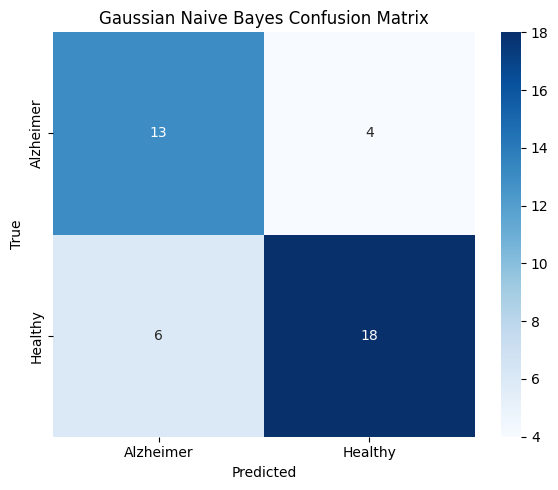

In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

y_pred_gnb = gaus.predict(X_test)

accuracy_gnb = accuracy_score(y_test, y_pred_gnb)
print(f"Gaussian Naive Bayes Accuracy: {accuracy_gnb * 100:.2f}%")

print("\nGaussianNB Classification Report:")
print(classification_report(y_test, y_pred_gnb))

cm_gnb = confusion_matrix(y_test, y_pred_gnb)
print("\nGaussianNB Confusion Matrix:")
print(cm_gnb)

plt.figure(figsize=(6, 5))
sns.heatmap(cm_gnb, annot=True, fmt='d', cmap='Blues', cbar=True,
            xticklabels=['Alzheimer', 'Healthy'],
            yticklabels=['Alzheimer', 'Healthy'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Gaussian Naive Bayes Confusion Matrix')
plt.tight_layout()
plt.show()


In [ ]:
from sklearn.naive_bayes import BernoulliNB

In [ ]:
bern = BernoulliNB()
bern.fit(X_train,y_train)

BernoulliNB()

Bernoulli Naive Bayes Accuracy: 58.54%

BernoulliNB Classification Report:
              precision    recall  f1-score   support

           0       0.50      0.53      0.51        17
           1       0.65      0.62      0.64        24

    accuracy                           0.59        41
   macro avg       0.58      0.58      0.58        41
weighted avg       0.59      0.59      0.59        41


BernoulliNB Confusion Matrix:
[[ 9  8]
 [ 9 15]]


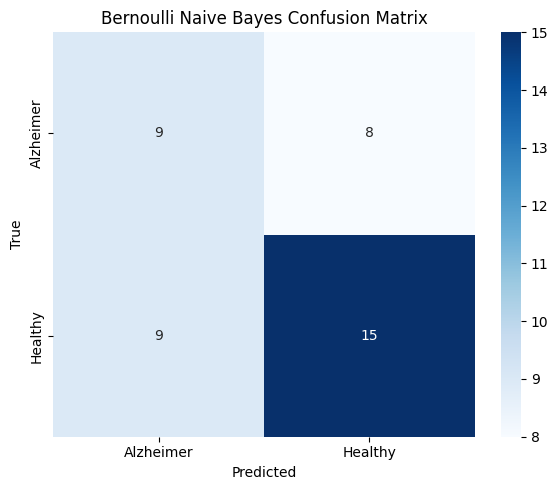

In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

y_pred_bern = bern.predict(X_test)

accuracy_bern = accuracy_score(y_test, y_pred_bern)
print(f"Bernoulli Naive Bayes Accuracy: {accuracy_bern * 100:.2f}%")

print("\nBernoulliNB Classification Report:")
print(classification_report(y_test, y_pred_bern))

cm_bern = confusion_matrix(y_test, y_pred_bern)
print("\nBernoulliNB Confusion Matrix:")
print(cm_bern)

plt.figure(figsize=(6, 5))
sns.heatmap(cm_bern, annot=True, fmt='d', cmap='Blues', cbar=True,
            xticklabels=['Alzheimer', 'Healthy'],
            yticklabels=['Alzheimer', 'Healthy'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Bernoulli Naive Bayes Confusion Matrix')
plt.tight_layout()
plt.show()


Ensemble Accuracy of RF, SVM, KNN: 95.1219512195122

Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.94      0.94        17
           1       0.96      0.96      0.96        24

    accuracy                           0.95        41
   macro avg       0.95      0.95      0.95        41
weighted avg       0.95      0.95      0.95        41


Confusion Matrix:
[[16  1]
 [ 1 23]]


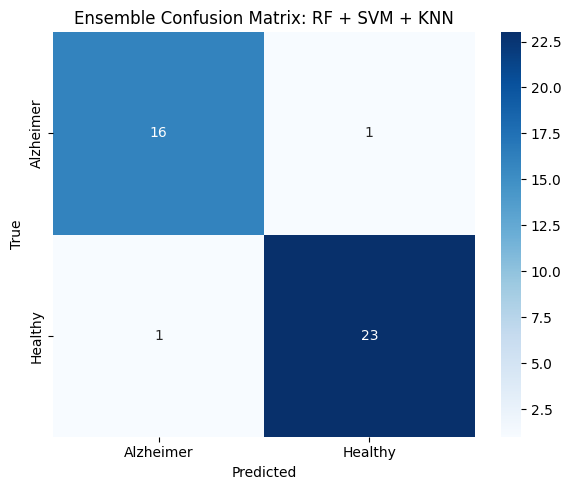

In [ ]:
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
svm_model = svm.SVC(probability=True, kernel='rbf', C=1, gamma='scale')  # enable probability for soft voting
knn_model = KNeighborsClassifier(n_neighbors=5)

ensemble_model = VotingClassifier(
    estimators=[
        ('rf', rf_model),
        ('svm', svm_model),
        ('knn', knn_model)
    ],
    voting='soft'
)


ensemble_model.fit(X_train, y_train)

y_pred = ensemble_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Ensemble Accuracy of RF, SVM, KNN:", accuracy * 100)

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("\nConfusion Matrix:")
cm = confusion_matrix(y_test, y_pred)
print(cm)

plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=True,
            xticklabels=['Alzheimer', 'Healthy'],
            yticklabels=['Alzheimer', 'Healthy'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Ensemble Confusion Matrix: RF + SVM + KNN')
plt.tight_layout()
plt.show()


Ensemble Accuracy (DT + SVM + Bernoulli NB): 95.1219512195122

Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.94      0.94        17
           1       0.96      0.96      0.96        24

    accuracy                           0.95        41
   macro avg       0.95      0.95      0.95        41
weighted avg       0.95      0.95      0.95        41


Confusion Matrix:
 [[16  1]
 [ 1 23]]


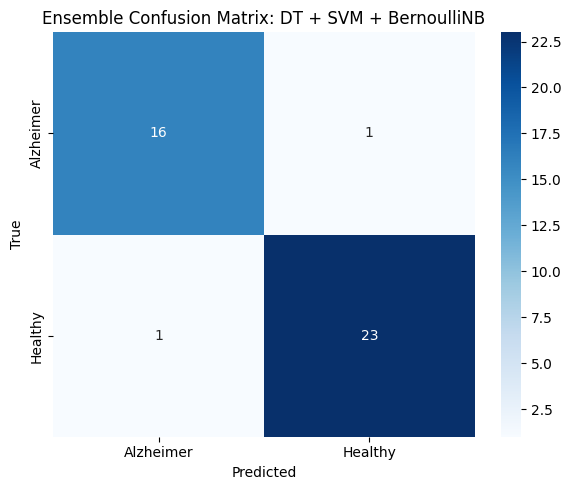

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

clf_dt = DecisionTreeClassifier(random_state=42)
clf_svm = SVC(probability=True, random_state=42)
clf_bern = BernoulliNB()

ensemble_dsb = VotingClassifier(estimators=[
    ('Decision Tree', clf_dt),
    ('SVM', clf_svm),
    ('Bernoulli NB', clf_bern)
], voting='soft')

ensemble_dsb.fit(X_train, y_train)

y_pred_dsb = ensemble_dsb.predict(X_test)

print("Ensemble Accuracy (DT + SVM + Bernoulli NB):", accuracy_score(y_test, y_pred_dsb) * 100)
print("\nClassification Report:\n", classification_report(y_test, y_pred_dsb))

cm = confusion_matrix(y_test, y_pred_dsb)
print("\nConfusion Matrix:\n", cm)

plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=True,
            xticklabels=['Alzheimer', 'Healthy'],
            yticklabels=['Alzheimer', 'Healthy'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Ensemble Confusion Matrix: DT + SVM + BernoulliNB')
plt.tight_layout()
plt.show()


Ensemble Accuracy (KNN + SVM + Logistic Regression): 90.2439024390244

Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.94      0.89        17
           1       0.95      0.88      0.91        24

    accuracy                           0.90        41
   macro avg       0.90      0.91      0.90        41
weighted avg       0.91      0.90      0.90        41


Confusion Matrix:
 [[16  1]
 [ 3 21]]


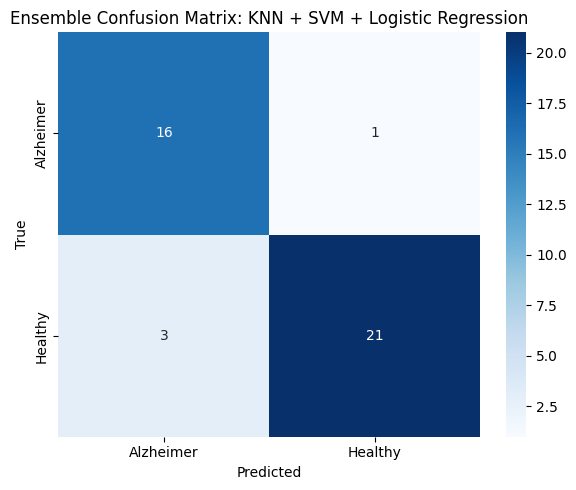

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

model_knn = KNeighborsClassifier()
model_svm = SVC(probability=True, random_state=42)
model_logreg = LogisticRegression(max_iter=1000, random_state=42)

ensemble_knn_svm_logreg = VotingClassifier(estimators=[
    ('KNN', model_knn),
    ('SVM', model_svm),
    ('Logistic Regression', model_logreg)
], voting='soft')

ensemble_knn_svm_logreg.fit(X_train, y_train)

y_pred_ensemble = ensemble_knn_svm_logreg.predict(X_test)

print("Ensemble Accuracy (KNN + SVM + Logistic Regression):", accuracy_score(y_test, y_pred_ensemble) * 100)
print("\nClassification Report:\n", classification_report(y_test, y_pred_ensemble))

cm = confusion_matrix(y_test, y_pred_ensemble)
print("\nConfusion Matrix:\n", cm)

plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=True,
            xticklabels=['Alzheimer', 'Healthy'],
            yticklabels=['Alzheimer', 'Healthy'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Ensemble Confusion Matrix: KNN + SVM + Logistic Regression')
plt.tight_layout()
plt.show()


Ensemble Accuracy (Random Forest + Decision Tree): 90.2439024390244

Classification Report:
               precision    recall  f1-score   support

           0       0.81      1.00      0.89        17
           1       1.00      0.83      0.91        24

    accuracy                           0.90        41
   macro avg       0.90      0.92      0.90        41
weighted avg       0.92      0.90      0.90        41


Confusion Matrix:
 [[17  0]
 [ 4 20]]


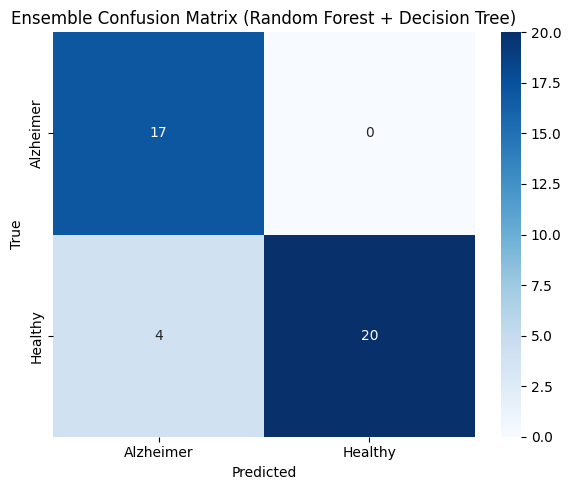

In [ ]:
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

model_rf = RandomForestClassifier(n_estimators=100, random_state=42)
model_dt = DecisionTreeClassifier(random_state=42)

ensemble_rf_dt = VotingClassifier(estimators=[
    ('Random Forest', model_rf),
    ('Decision Tree', model_dt)
], voting='hard')

ensemble_rf_dt.fit(X_train, y_train)

y_pred_rf_dt = ensemble_rf_dt.predict(X_test)

print("Ensemble Accuracy (Random Forest + Decision Tree):", accuracy_score(y_test, y_pred_rf_dt) * 100)
print("\nClassification Report:\n", classification_report(y_test, y_pred_rf_dt))

cm_rf_dt = confusion_matrix(y_test, y_pred_rf_dt)
print("\nConfusion Matrix:\n", cm_rf_dt)

plt.figure(figsize=(6, 5))
sns.heatmap(cm_rf_dt, annot=True, fmt='d', cmap='Blues', cbar=True,
            xticklabels=['Alzheimer', 'Healthy'],
            yticklabels=['Alzheimer', 'Healthy'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Ensemble Confusion Matrix (Random Forest + Decision Tree)')
plt.tight_layout()
plt.show()


Ensemble Accuracy (BernoulliNB + GaussianNB): 73.17073170731707

Classification Report:
               precision    recall  f1-score   support

           0       0.65      0.76      0.70        17
           1       0.81      0.71      0.76        24

    accuracy                           0.73        41
   macro avg       0.73      0.74      0.73        41
weighted avg       0.74      0.73      0.73        41


Confusion Matrix:
 [[13  4]
 [ 7 17]]


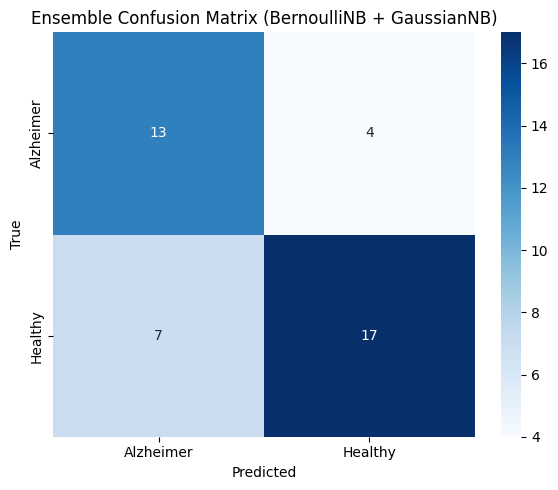

In [ ]:
from sklearn.naive_bayes import BernoulliNB, GaussianNB
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

model_bernoulli = BernoulliNB()
model_gaussian = GaussianNB()

ensemble_nb = VotingClassifier(estimators=[
    ('BernoulliNB', model_bernoulli),
    ('GaussianNB', model_gaussian)
], voting='soft')

ensemble_nb.fit(X_train, y_train)

y_pred_nb = ensemble_nb.predict(X_test)

print("Ensemble Accuracy (BernoulliNB + GaussianNB):", accuracy_score(y_test, y_pred_nb) * 100)
print("\nClassification Report:\n", classification_report(y_test, y_pred_nb))

cm_nb = confusion_matrix(y_test, y_pred_nb)
print("\nConfusion Matrix:\n", cm_nb)

plt.figure(figsize=(6, 5))
sns.heatmap(cm_nb, annot=True, fmt='d', cmap='Blues', cbar=True,
            xticklabels=['Alzheimer', 'Healthy'],
            yticklabels=['Alzheimer', 'Healthy'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Ensemble Confusion Matrix (BernoulliNB + GaussianNB)')
plt.tight_layout()
plt.show()


Ensemble Accuracy (Decision Tree + SVM + BernoulliNB): 95.12%

Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.94      0.94        17
           1       0.96      0.96      0.96        24

    accuracy                           0.95        41
   macro avg       0.95      0.95      0.95        41
weighted avg       0.95      0.95      0.95        41


Confusion Matrix:
[[16  1]
 [ 1 23]]


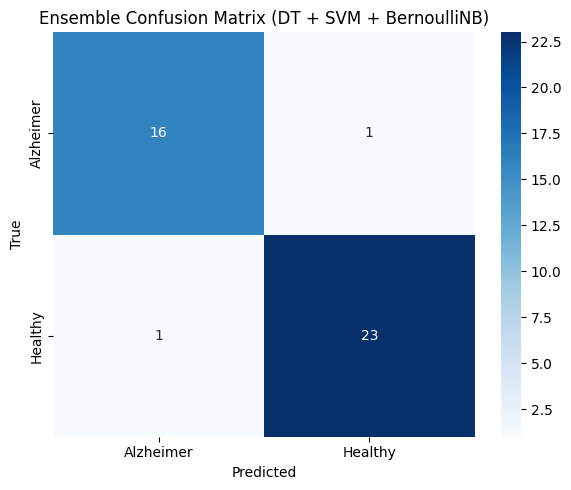

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm
from sklearn.naive_bayes import BernoulliNB
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

model_tree = DecisionTreeClassifier(random_state=42)
model_svm = svm.SVC(probability=True, random_state=42)
model_bernoulli = BernoulliNB()

ensemble_dsb = VotingClassifier(estimators=[
    ('DecisionTree', model_tree),
    ('SVM', model_svm),
    ('BernoulliNB', model_bernoulli)
], voting='soft')

ensemble_dsb.fit(X_train, y_train)

y_pred_dsb = ensemble_dsb.predict(X_test)

accuracy_dsb = accuracy_score(y_test, y_pred_dsb)
print(f"Ensemble Accuracy (Decision Tree + SVM + BernoulliNB): {accuracy_dsb * 100:.2f}%")

print("\nClassification Report:")
print(classification_report(y_test, y_pred_dsb))

cm_dsb = confusion_matrix(y_test, y_pred_dsb)
print("\nConfusion Matrix:")
print(cm_dsb)

plt.figure(figsize=(6, 5))
sns.heatmap(cm_dsb, annot=True, fmt='d', cmap='Blues', cbar=True,
            xticklabels=['Alzheimer', 'Healthy'],
            yticklabels=['Alzheimer', 'Healthy'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Ensemble Confusion Matrix (DT + SVM + BernoulliNB)')
plt.tight_layout()
plt.show()
